In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

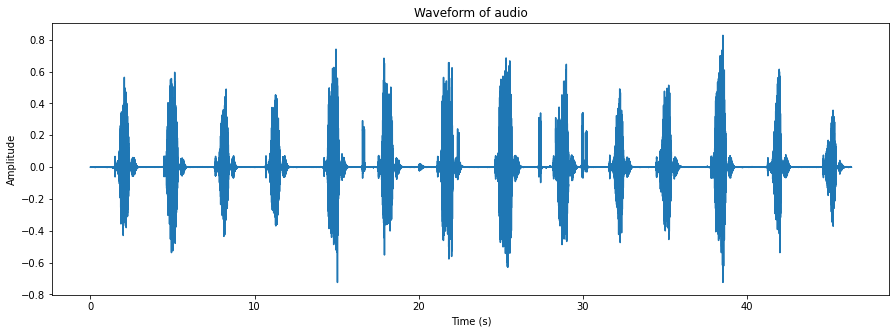

In [2]:
file_path = '2024-02-24_sleep_1.wav'

 # sr=None: keep original sample rate
signal, sr = librosa.load(file_path, sr=None, mono=True)

# Time axis in seconds
time = np.linspace(0, len(signal) / sr, num=len(signal))

plt.figure(figsize=(15, 5))
plt.plot(time, signal)
plt.title("Waveform of audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [3]:
# Find peaks
peaks, _ = find_peaks(signal, height=0)

In [4]:
len(peaks)

320276

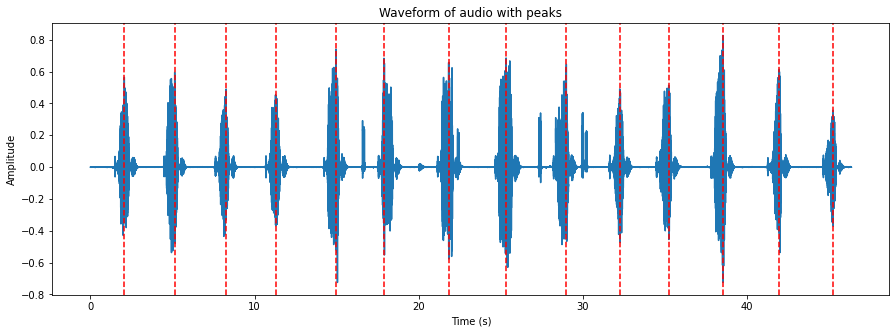

In [5]:
# Find peaks with adjusted parameters
# Adjust 'prominence' and 'distance' as needed to detect peaks correctly
# Parameters set experimentally
peaks, _ = find_peaks(signal, prominence=0.7, distance=sr/2)

plt.figure(figsize=(15, 5))
plt.plot(time, signal)
plt.title("Waveform of audio with peaks")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

for peak in peaks:
    plt.axvline(x=time[peak], color='r', linestyle='--')

plt.show()

In [6]:
peak_times = [time[peak_index] for peak_index in peaks]
peak_times

[2.0615202822305534,
 5.132905003750732,
 8.269437149411004,
 11.2773071006505,
 14.96551752055524,
 17.889577907011656,
 21.830917702369184,
 25.332143903875313,
 29.00484411211565,
 32.25960760809491,
 35.24573151695698,
 38.549542655962696,
 41.98310442529547,
 45.263854328537015]

In [7]:
mean_interval = np.mean(np.diff(peak_times))
mean_interval

3.323256465100497

In [8]:
total_duration = time[-1]
peaks_per_minute = (len(peaks) / total_duration) * 60
peaks_per_minute

18.11039597546756

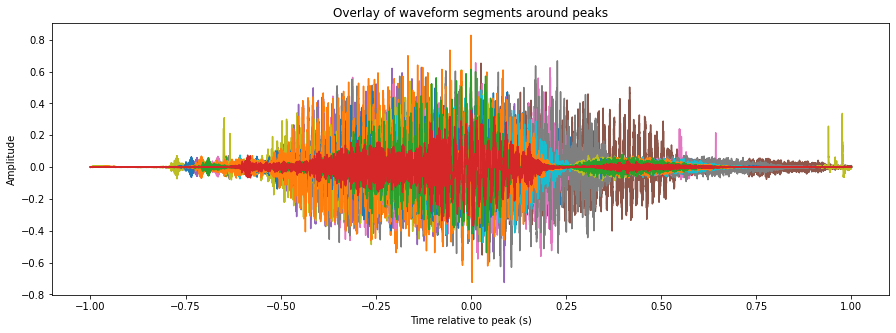

In [9]:
# Define a window around each peak (1 s before and after the peak)
window_size = sr # 1 second window (assuming sr is in Hz)

plt.figure(figsize=(15, 5))

# For each peak, extract and plot the waveform segment
for peak in peaks:
    start = max(0, peak - window_size) # Start of the segment
    end = min(len(signal), peak + window_size) # End of the segment
    segment = signal[start:end] # Extract the segment
    time_segment = np.linspace(-window_size/sr, window_size/sr, num=len(segment))
    plt.plot(time_segment, segment)

plt.title("Overlay of waveform segments around peaks")
plt.xlabel("Time relative to peak (s)")
plt.ylabel("Amplitude")
plt.show()

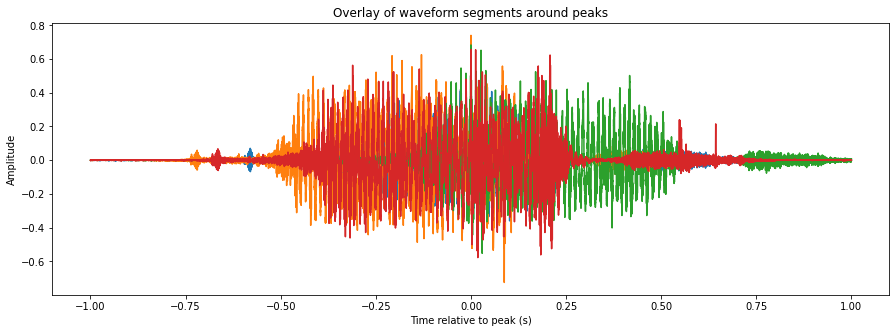

In [10]:
plt.figure(figsize=(15, 5))

# For each peak, extract and plot the waveform segment
for peak in peaks[3:7]:
    start = max(0, peak - window_size) # Start of the segment
    end = min(len(signal), peak + window_size) # End of the segment
    segment = signal[start:end] # Extract the segment
    time_segment = np.linspace(-window_size/sr, window_size/sr, num=len(segment))
    plt.plot(time_segment, segment)

plt.title("Overlay of waveform segments around peaks")
plt.xlabel("Time relative to peak (s)")
plt.ylabel("Amplitude")
plt.show()

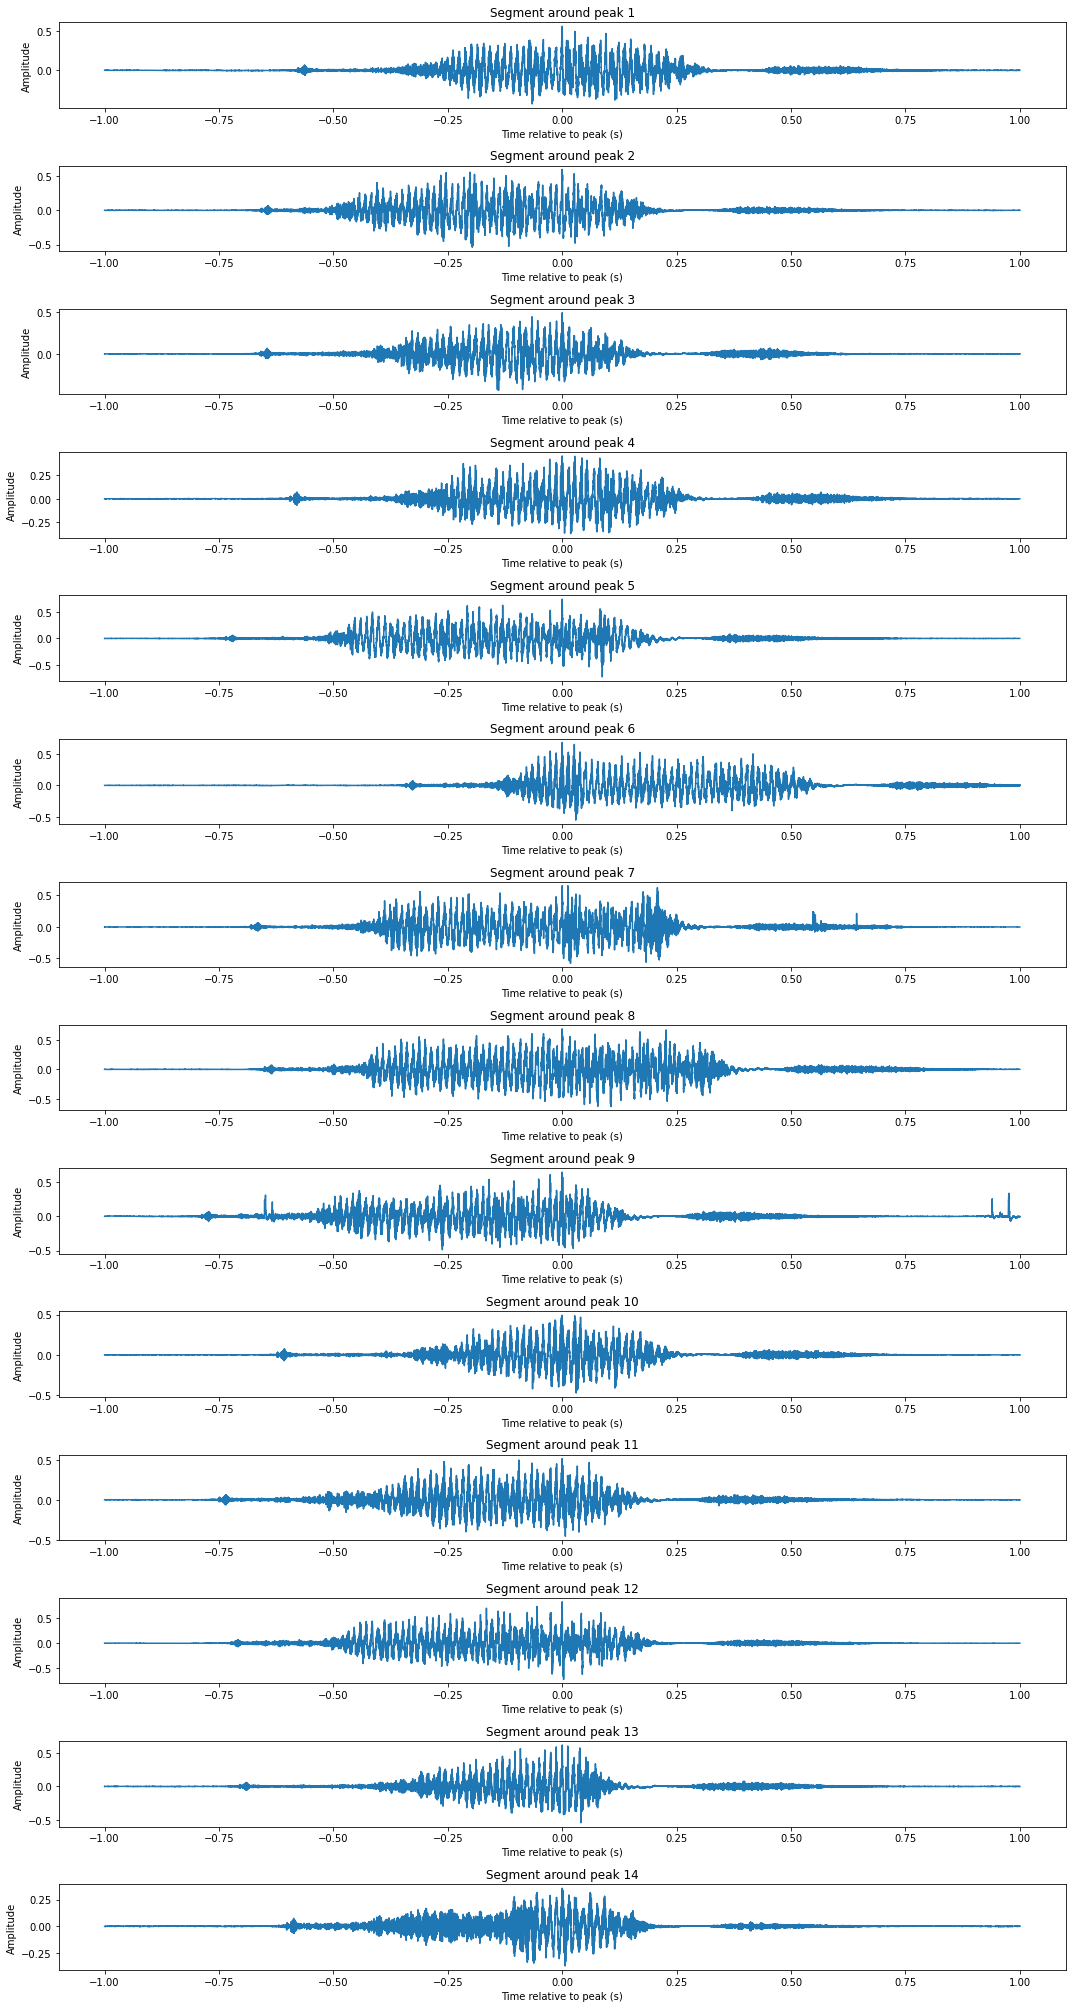

In [11]:
# Creating a figure for subplots
plt.figure(figsize=(15, len(peaks) * 2))

for i, peak in enumerate(peaks):
    start = max(0, peak - window_size)  # Start of the segment
    end = min(len(signal), peak + window_size)  # End of the segment
    segment = signal[start:end]  # Extract the segment
    time_segment = np.linspace(-window_size/sr, window_size/sr, num=len(segment))

    # Creating a subplot for each segment
    plt.subplot(len(peaks), 1, i+1)
    plt.plot(time_segment, segment)
    plt.title(f"Segment around peak {i+1}")
    plt.xlabel("Time relative to peak (s)")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

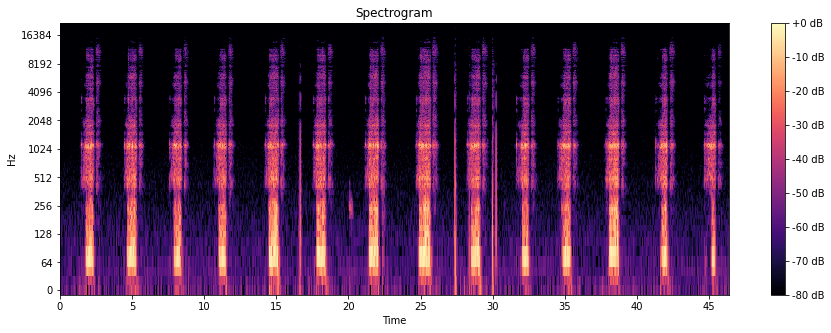

In [12]:
plt.figure(figsize=(15, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

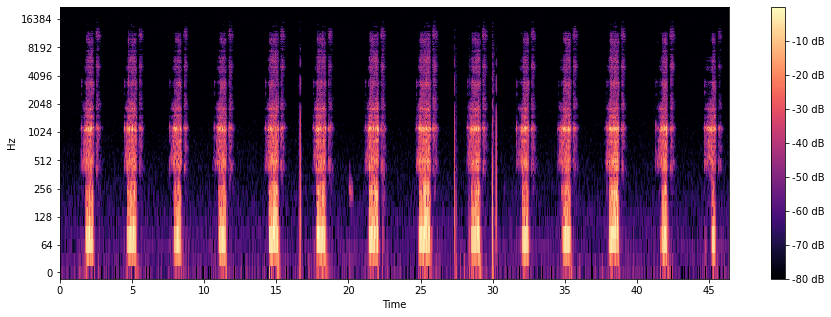

In [13]:
# Increase FFT window size and decrease hop length

n_fft = 1500
hop_length = 50 # Decrease from the default (512) for higher time resolution

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# Convert amplitude to decibels for visualization
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(15, 5))
librosa.display.specshow(D_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.show()